### Божнюк Александр Сергеевич, 271 группа
# Решение задачи по модели "Хищник и жертва".
# Задание 
Рассматривается закрытый ареал, в котором обитают два вида — травоядные («жертвы») и хищники. Предполагается, что животные не иммигрируют и не эмигрируют, и что еды для травоядных животных имеется с избытком. Тогда уравнение изменения количества жертв (без учёта хищников) принимает вид:
$$ \frac {dx}{dt}=\alpha x,$$
где $\alpha$ — коэффициент рождаемости жертв, $x$ — величина популяции жертв, $ \frac {dx}{dt}$ — скорость прироста популяции жертв.

Пока хищники не охотятся, они вымирают, следовательно, уравнение для численности хищников (без учёта численности жертв) принимает вид:

$$\frac {dy}{dt}=-\gamma y,$$
где $\gamma$  — коэффициент убыли хищников, $y$ — величина популяции хищников, $\frac {dy}{dt}$ — скорость прироста популяции хищников.

При встречах хищников и жертв (частота которых прямо пропорциональна величине $xy$ происходит убийство жертв с коэффициентом $\beta$, сытые хищники способны к воспроизводству с коэффициентом $\delta$. С учётом этого, система уравнений модели такова:

\begin{cases}{\dfrac {dx}{dt}}=\alpha x-\beta xy=(\alpha -\beta y)x\\{\dfrac {dy}{dt}}=-\gamma y+\delta xy=(\delta x-\gamma )y\end{cases}

Также зададим начало процесса в момент времени $t = 0$ с заданными значениями популяций $x(0)$ и $y(0)$. Дополняем дифференциальные уравнения двумя *начальными условиями*
$$x(0) = x_0, y(0) = y_0.$$

# Решение (Python3)

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Метод Рунге-Кутта 3-го порядка

In [2]:
def runge_kutta3(x_0, y_0, begin, end, h, alpha, beta, gamma, delta):
    steps_n = int((end - begin) / h)
    f_x = lambda x, y: (alpha - beta * y) * x
    f_y = lambda x, y: (delta * x - gamma) * y
    x = np.zeros(steps_n)
    y = np.zeros(steps_n)
    x[0] = x_0
    y[0] = y_0

    def get_deltas(x, y):
        kx_1 = h * f_x(x, y)
        ky_1 = h * f_y(x, y)
        kx_2 = h * f_x(x + h / 2, y + kx_1 / 2)
        ky_2 = h * f_y(x + h / 2, y + ky_1 / 2)
        kx_3 = h * f_x(x + h, y - kx_1 + 2 * kx_2)
        ky_3 = h * f_y(x + h, y - ky_1 + 2 * ky_2)
        delta_x = (kx_1 + 4 * kx_2 + kx_3) / 6
        delta_y = (ky_1 + 4 * ky_2 + ky_3) / 6
        return delta_x, delta_y

    for i in range(steps_n - 1):
        deltas = get_deltas(x[i], y[i])
        x[i + 1] = x[i] + deltas[0]
        y[i + 1] = y[i] + deltas[1]
    return x, y        

## Метод Рунге-Кутта 4-го порядка

In [3]:
def runge_kutta4(x_0, y_0, begin, end, h, alpha, beta, gamma, delta):
    steps_n = int((end - begin) / h)
    f_x = lambda x, y: (alpha - beta * y) * x
    f_y = lambda x, y: (delta * x - gamma) * y
    x = np.zeros(steps_n)
    y = np.zeros(steps_n)
    x[0] = x_0
    y[0] = y_0

    def get_deltas(x, y):
        kx_1 = h * f_x(x, y)
        ky_1 = h * f_y(x, y)
        kx_2 = h * f_x(x + h / 2, y + kx_1 / 2)
        ky_2 = h * f_y(x + h / 2, y + ky_1 / 2)
        kx_3 = h * f_x(x + h / 2, y + kx_2 / 2)
        ky_3 = h * f_y(x + h / 2, y + ky_2 / 2)
        kx_4 = h * f_x(x + h, y + kx_3)
        ky_4 = h * f_y(x + h, y + ky_3)
        delta_x = (kx_1 + 2 * kx_2 + 2 * kx_3 + kx_4) / 6
        delta_y = (ky_1 + 2 * ky_2 + 2 * ky_3 + ky_4) / 6
        return delta_x, delta_y

    for i in range(steps_n - 1):
        deltas = get_deltas(x[i], y[i])
        x[i + 1] = x[i] + deltas[0]
        y[i + 1] = y[i] + deltas[1]
    return x, y  

## Пример решения задачи "хищник-жертва"
Рассмотрим следующие условия: 
$$y_0 = 5, x_0 = 10, \alpha = 1, \beta = 0.25, \gamma = 1, \delta = 0.1, t \in [0;10]$$ при разном размере шага: $h_1 = 0.25, h_2 = 0.5, h_3 = 0.1$

In [4]:
x_0 = 10 
y_0 = 5 
alpha = 1 
beta = 0.25 
gamma = 1 
delta = 0.1
h1 = 0.25
h2 = 0.5
h3 = 0.1
t_beg = 0
t_end = 10

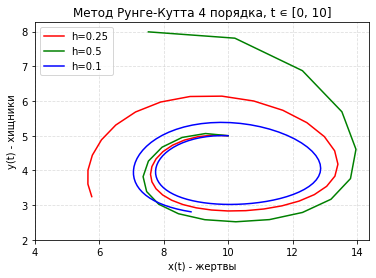

In [5]:
x1, y1 = runge_kutta4(x_0, y_0, t_beg, t_end, h1, alpha, beta, gamma, delta)
x2, y2 = runge_kutta4(x_0, y_0, t_beg, t_end, h2, alpha, beta, gamma, delta)
x3, y3 = runge_kutta4(x_0, y_0, t_beg, t_end, h3, alpha, beta, gamma, delta)

plt.plot(x1, y1, 'r', label='h=0.25')
plt.plot(x2, y2, 'g', label='h=0.5')
plt.plot(x3, y3, 'b', label='h=0.1')
plt.ylim(ymin=2)
plt.xlim(xmin=4)
plt.ylabel('y(t) - хищники')
plt.xlabel('x(t) - жертвы')
plt.grid(alpha=.4, linestyle='--')
plt.legend()
plt.title('Метод Рунге-Кутта 4 порядка, t ∊ [0, 10]')
plt.show()

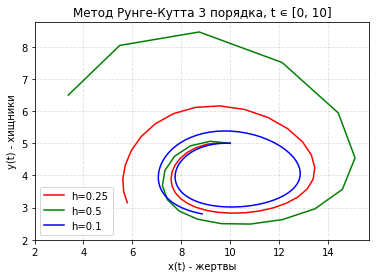

In [6]:
x1, y1 = runge_kutta3(x_0, y_0, t_beg, t_end, h1, alpha, beta, gamma, delta)
x2, y2 = runge_kutta3(x_0, y_0, t_beg, t_end, h2, alpha, beta, gamma, delta)
x3, y3 = runge_kutta3(x_0, y_0, t_beg, t_end, h3, alpha, beta, gamma, delta)

plt.plot(x1, y1, 'r', label='h=0.25')
plt.plot(x2, y2, 'g', label='h=0.5')
plt.plot(x3, y3, 'b', label='h=0.1')
plt.ylim(ymin=2)
plt.xlim(xmin=2)
plt.ylabel('y(t) - хищники')
plt.xlabel('x(t) - жертвы')
plt.grid(alpha=.4, linestyle='--')
plt.legend()
plt.title('Метод Рунге-Кутта 3 порядка, t ∊ [0, 10]')
plt.show()

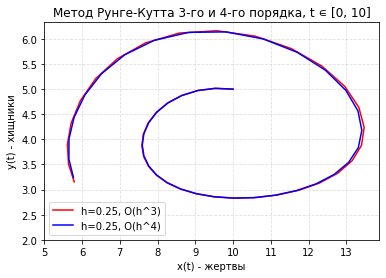

In [7]:
x1, y1 = runge_kutta3(x_0, y_0, t_beg, t_end, h1, alpha, beta, gamma, delta)
x2, y2 = runge_kutta4(x_0, y_0, t_beg, t_end, h1, alpha, beta, gamma, delta)
plt.plot(x1, y1, 'r', label='h=0.25, O(h^3)')
plt.plot(x2, y2, 'b', label='h=0.25, O(h^4)')
plt.ylim(ymin=2)
plt.xlim(xmin=5)
plt.ylabel('y(t) - хищники')
plt.xlabel('x(t) - жертвы')
plt.grid(alpha=.4, linestyle='--')
plt.legend()
plt.title('Метод Рунге-Кутта 3-го и 4-го порядка, t ∊ [0, 10]')
plt.show()

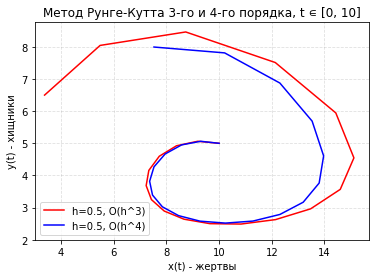

In [8]:
x1, y1 = runge_kutta3(x_0, y_0, t_beg, t_end, h2, alpha, beta, gamma, delta)
x2, y2 = runge_kutta4(x_0, y_0, t_beg, t_end, h2, alpha, beta, gamma, delta)
plt.plot(x1, y1, 'r', label='h=0.5, O(h^3)')
plt.plot(x2, y2, 'b', label='h=0.5, O(h^4)')
plt.ylim(ymin=2)
plt.xlim(xmin=3)
plt.ylabel('y(t) - хищники')
plt.xlabel('x(t) - жертвы')
plt.grid(alpha=.4, linestyle='--')
plt.legend()
plt.title('Метод Рунге-Кутта 3-го и 4-го порядка, t ∊ [0, 10]')
plt.show()

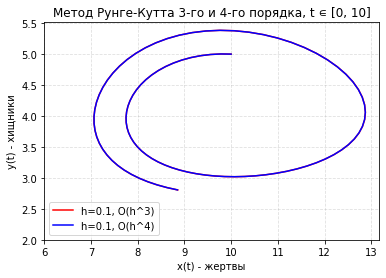

In [9]:
x1, y1 = runge_kutta3(x_0, y_0, t_beg, t_end, h3, alpha, beta, gamma, delta)
x2, y2 = runge_kutta4(x_0, y_0, t_beg, t_end, h3, alpha, beta, gamma, delta)
plt.plot(x1, y1, 'r', label='h=0.1, O(h^3)')
plt.plot(x2, y2, 'b', label='h=0.1, O(h^4)')
plt.ylim(ymin=2)
plt.xlim(xmin=6)
plt.ylabel('y(t) - хищники')
plt.xlabel('x(t) - жертвы')
plt.grid(alpha=.4, linestyle='--')
plt.legend()
plt.title('Метод Рунге-Кутта 3-го и 4-го порядка, t ∊ [0, 10]')
plt.show()

Посмотрим на результат при $h_1$ и $t \in [0; 25]: $ 

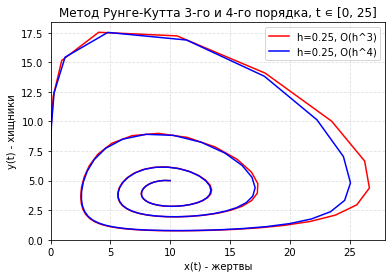

In [10]:
t_beg = 0
t_end = 25
x1, y1 = runge_kutta3(x_0, y_0, t_beg, t_end, h1, alpha, beta, gamma, delta)
x2, y2 = runge_kutta4(x_0, y_0, t_beg, t_end, h1, alpha, beta, gamma, delta)
plt.plot(x1, y1, 'r', label='h=0.25, O(h^3)')
plt.plot(x2, y2, 'b', label='h=0.25, O(h^4)')
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.ylabel('y(t) - хищники')
plt.xlabel('x(t) - жертвы')
plt.grid(alpha=.4, linestyle='--')
plt.legend()
plt.title('Метод Рунге-Кутта 3-го и 4-го порядка, t ∊ [0, 25]')
plt.show()

## Вывод
В итоге получили, что на предложенных начальных данных метод Рунге-Кутта 4-го порядка показал себя лучше, чем метод Рунге-Кутта 3-го порядка. Это обусловлено бОльшим порядком погрешности. 